In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras import activations

from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam,SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

## 2. 데이터 불러오기 & 변환
- one-hot Encoding
- Machine Learning에서 사용한 데이터와 같음
- 딥러닝에선 np.array로 변환해줘야
- dataframe에서 value만 뽑아온다음 3차원 배열로 만들어주면 된다.

In [259]:
lunch_X_train=pd.read_csv("data/split/lunch_X_train.csv")
lunch_X_test=pd.read_csv("data/split/lunch_X_test.csv")
lunch_y_train=pd.read_csv("data/split/lunch_y_train.csv")
lunch_y_test=pd.read_csv("data/split/lunch_y_test.csv")
dinner_X_train=pd.read_csv("data/split/dinner_X_train.csv")
dinner_X_test=pd.read_csv("data/split/dinner_X_test.csv")
dinner_y_train=pd.read_csv("data/split/dinner_y_train.csv")
dinner_y_test=pd.read_csv("data/split/dinner_y_test.csv")

In [260]:
#Feature Scaling이 안되어있다......
lunch_X_train.head()

,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,temperature,rain,wind,humidity,...,date_22,date_23,date_24,date_25,date_26,date_27,date_28,date_29,date_30,date_31
0,2990,2212,223,157,5,398,3.0,0.0,0.4,52.4,...,0,0,0,0,0,0,0,0,0,0
1,2665,1934,489,242,5,0,2.1,0.0,1.0,66.3,...,0,0,0,0,0,0,0,1,0,0
2,2714,2392,56,266,438,0,17.4,0.0,1.5,75.8,...,0,0,0,0,0,0,0,0,0,0
3,3305,2071,1026,208,7,0,27.8,0.0,1.9,71.4,...,0,0,0,0,0,0,0,0,0,0
4,3121,2749,112,260,534,0,14.9,0.0,1.0,75.6,...,0,0,0,0,0,0,0,0,0,0


In [261]:
#### 데이터프레임 배열 확인
data_list = [lunch_X_train, lunch_X_test, lunch_y_train, lunch_y_test, dinner_X_train,dinner_X_test,dinner_y_train, dinner_y_test]
for data in data_list:
    print(data.shape)

(902, 75)
(301, 75)
(902, 1)
(301, 1)
(902, 75)
(301, 75)
(902, 1)
(301, 1)


In [262]:
#### 데이터프레임 -> 넘파이 배열로
#### 훈련 돌아야하는 data는 배열을 3차원 배열로 바꿔준다.

# 이거 왜 안됨?
# data_list = [lunch_X_train, lunch_X_test, dinner_X_train, dinner_X_test]
# target_list = [lunch_y_train, lunch_y_test, dinner_y_train, dinner_y_test]
# for X in data_list:
#     X = X.to_numpy()
#     X = X.reshape(X[0], X[1], 1)

# for y in target_list:
#     y = y.to_numpy()

lunch_X_train=lunch_X_train.to_numpy()
lunch_X_train = lunch_X_train.reshape(lunch_X_train.shape[0], lunch_X_train.shape[1], 1)
lunch_X_test=lunch_X_test.to_numpy()
lunch_X_test = lunch_X_test.reshape(lunch_X_test.shape[0], lunch_X_test.shape[1], 1)
lunch_y_train=lunch_y_train.to_numpy()
lunch_y_test=lunch_y_test.to_numpy()
dinner_X_train=dinner_X_train.to_numpy()
dinner_X_train = dinner_X_train.reshape(dinner_X_train.shape[0], dinner_X_train.shape[1], 1)
dinner_X_test=dinner_X_test.to_numpy()
dinner_X_test = dinner_X_test.reshape(dinner_X_test.shape[0], dinner_X_test.shape[1], 1)
dinner_y_train=dinner_y_train.to_numpy()
dinner_y_test=dinner_y_test.to_numpy()

In [263]:
# 확인
lunch_X_train.shape

(902, 75, 1)

## 3. LSTM 모델 구현

In [264]:
model = keras.Sequential([
     layers.LSTM(128, input_shape=(None, 1)),
     layers.Dense(128),
     layers.Dense(1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00001), loss = 'mse', metrics=['accuracy'])
model.summary()


# model = keras.Sequential() # Sequeatial Model 
# model.add(layers.LSTM(20, input_shape=(28, 1))) # (timestep, feature) 
# model.add(Dense(1)) # output = 1 
# model.compile(loss='mean_squared_error', optimizer='adam') 
# model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_49 (LSTM)              (None, 128)               66560     
                                                                 
 dense_93 (Dense)            (None, 128)               16512     
                                                                 
 dense_94 (Dense)            (None, 1)                 129       
                                                                 
Total params: 83,201
Trainable params: 83,201
Non-trainable params: 0
_________________________________________________________________


In [265]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(lunch_X_train, lunch_y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100


2022-01-20 16:39:23.959196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:39:24.154010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:39:24.355864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 39ms/step - loss: 833888.0625 - accuracy: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 1s 26ms/step - loss: 833867.1250 - accuracy: 0.0000e+00
Epoch 3/100
31/31 [==============================] - 1s 28ms/step - loss: 833845.6250 - accuracy: 0.0000e+00
Epoch 4/100
31/31 [==============================] - 1s 28ms/step - loss: 833822.2500 - accuracy: 0.0000e+00
Epoch 5/100
31/31 [==============================] - 1s 26ms/step - loss: 833796.1250 - accuracy: 0.0000e+00
Epoch 6/100
31/31 [==============================] - 1s 26ms/step - loss: 833766.1875 - accuracy: 0.0000e+00
Epoch 7/100
31/31 [==============================] - 1s 26ms/step - loss: 833730.7500 - accuracy: 0.0000e+00
Epoch 8/100
31/31 [==============================] - 1s 27ms/step - loss: 833688.2500 - accuracy: 0.0000e+00
Epoch 9/100
31/31 [==============================] - 1s 26ms/step - loss: 833632.6250 - accuracy: 0.0000e+00
Epoch 10/100
31/31 [===========

In [93]:
## 분석으로 나온 예측값과 실제값의 차이가 너무 크다. 40000이라니 :(
model.evaluate(lunch_X_test, lunch_y_test)

 1/10 [==>...........................] - ETA: 2s - loss: 46240.5820 - accuracy: 0.0000e+00

2022-01-20 13:48:17.012039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 13:48:17.065221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 23ms/step - loss: 41258.8398 - accuracy: 0.0000e+00


[41258.83984375, 0.0]

## 데이터 스케일링 후 다시 시도

In [266]:
lunch_X_train=pd.read_csv("data/split/lunch_X_train.csv")
lunch_X_test=pd.read_csv("data/split/lunch_X_test.csv")
lunch_y_train=pd.read_csv("data/split/lunch_y_train.csv")
lunch_y_test=pd.read_csv("data/split/lunch_y_test.csv")
dinner_X_train=pd.read_csv("data/split/dinner_X_train.csv")
dinner_X_test=pd.read_csv("data/split/dinner_X_test.csv")
dinner_y_train=pd.read_csv("data/split/dinner_y_train.csv")
dinner_y_test=pd.read_csv("data/split/dinner_y_test.csv")

In [267]:
lunch_y_train = lunch_y_train.astype(float)
lunch_y_test = lunch_y_test.astype(float)
dinner_y_train = dinner_y_train.astype(float)
dinner_y_test = dinner_y_test.astype(float)

In [268]:
#### 데이터프레임 -> 넘파이 배열로
#### 훈련 돌아야하는 data는 배열을 3차원 배열로 바꿔준다.

# 이거 왜 안됨?
# data_list = [lunch_X_train, lunch_X_test, dinner_X_train, dinner_X_test]
# target_list = [lunch_y_train, lunch_y_test, dinner_y_train, dinner_y_test]
# for X in data_list:
#     X = X.to_numpy()
#     X = X.reshape(X[0], X[1], 1)

# for y in target_list:
#     y = y.to_numpy()


lunch_X_train=lunch_X_train.to_numpy()
lunch_X_train = lunch_X_train.reshape(lunch_X_train.shape[0], lunch_X_train.shape[1], 1)
lunch_X_test=lunch_X_test.to_numpy()
lunch_X_test = lunch_X_test.reshape(lunch_X_test.shape[0], lunch_X_test.shape[1], 1)
lunch_y_train=lunch_y_train.to_numpy()
lunch_y_test=lunch_y_test.to_numpy()
dinner_X_train=dinner_X_train.to_numpy()
dinner_X_train = dinner_X_train.reshape(dinner_X_train.shape[0], dinner_X_train.shape[1], 1)
dinner_X_test=dinner_X_test.to_numpy()
dinner_X_test = dinner_X_test.reshape(dinner_X_test.shape[0], dinner_X_test.shape[1], 1)
dinner_y_train=dinner_y_train.to_numpy()
dinner_y_test=dinner_y_test.to_numpy()

In [269]:
lunch_X_mean = lunch_X_train.mean(axis=0)
lunch_X_std = lunch_X_train.std(axis=0)
dinner_X_mean = dinner_X_train.mean(axis=0)
dinner_X_std = dinner_X_train.std(axis=0)

# lunch_X_train -= lunch_X_mean
# lunch_X_train /= lunch_X_std
# lunch_X_test -= lunch_X_mean
# lunch_X_test /= lunch_X_std
# dinner_X_train -= dinner_X_mean
# dinner_X_train /= dinner_X_std
# dinner_X_test -= dinner_X_mean
# dinner_X_test /= dinner_X_std


lunch_y_mean = lunch_y_train.mean(axis=0)
lunch_y_std = lunch_y_train.std(axis=0)
dinner_y_mean = dinner_y_train.mean(axis=0)
dinner_y_std = dinner_y_train.std(axis=0)

lunch_y_train -= lunch_y_mean
lunch_y_train /= lunch_y_std
lunch_y_test -= lunch_y_mean
lunch_y_test /= lunch_y_std
dinner_y_train -= dinner_y_mean
dinner_y_train /= dinner_y_std
dinner_y_test -= dinner_y_mean
dinner_y_test /= dinner_y_std


In [282]:
model = keras.Sequential([
    layers.LSTM(256, input_shape=(None, 1)),
    layers.Dense(1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001), loss = 'mse')
model.summary()

# model = keras.Sequential([
#     layers.LSTM(128, input_shape=(None, 1)),
#     layers.Dense(128),
#     layers.Dense(1)
# ])
# model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00001), loss = 'mse', metrics=['accuracy'])
# model.summary()

# model = keras.Sequential() # Sequeatial Model 
# model.add(layers.LSTM(20, input_shape=(28, 1))) # (timestep, feature) 
# model.add(Dense(1)) # output = 1 
# model.compile(loss='mean_squared_error', optimizer='adam') 
# model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 256)               264192    
                                                                 
 dense_97 (Dense)            (None, 1)                 257       
                                                                 
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


### 점심

In [283]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(lunch_X_train, lunch_y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100


2022-01-20 16:43:25.756463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:43:25.945792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:43:26.197644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 44ms/step - loss: 0.9993
Epoch 2/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9952
Epoch 3/100
31/31 [==============================] - 1s 31ms/step - loss: 0.9915
Epoch 4/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9860
Epoch 5/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9409
Epoch 6/100
31/31 [==============================] - 1s 35ms/step - loss: 0.8911
Epoch 7/100
31/31 [==============================] - 1s 32ms/step - loss: 0.8988
Epoch 00007: early stopping


In [284]:
## 분석으로 나온 예측값과 실제값의 차이가 너무 크다. 40000이라니 :(
model.evaluate(lunch_X_test, lunch_y_test)

2022-01-20 16:43:36.768796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:43:36.858911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 30ms/step - loss: 1.0793


1.0792758464813232

2022-01-20 16:43:38.434981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:43:38.476176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


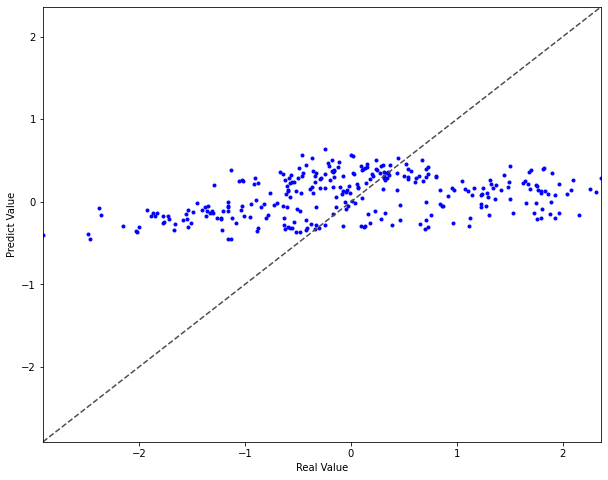

In [285]:
pred = model.predict(lunch_X_test)

plt.figure(figsize=(10,8))
plt.plot(lunch_y_test, pred, 'b.')

plt.axis([min(lunch_y_test), max(lunch_y_test), min(lunch_y_test), max(lunch_y_test)])

plt.plot([min(lunch_y_test), max(lunch_y_test)], [min(lunch_y_test), max(lunch_y_test)], ls = "--", c=".3")
plt.xlabel("Real Value")
plt.ylabel("Predict Value")

plt.show()

### 저녁

In [286]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(dinner_X_train, dinner_y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
31/31 [==============================] - 1s 37ms/step - loss: 0.9350
Epoch 2/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9307
Epoch 3/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9290
Epoch 4/100
31/31 [==============================] - 1s 33ms/step - loss: 0.9306
Epoch 00004: early stopping


## GRU 시도

In [274]:
lunch_X_train=pd.read_csv("data/split/lunch_X_train.csv")
lunch_X_test=pd.read_csv("data/split/lunch_X_test.csv")
lunch_y_train=pd.read_csv("data/split/lunch_y_train.csv")
lunch_y_test=pd.read_csv("data/split/lunch_y_test.csv")
dinner_X_train=pd.read_csv("data/split/dinner_X_train.csv")
dinner_X_test=pd.read_csv("data/split/dinner_X_test.csv")
dinner_y_train=pd.read_csv("data/split/dinner_y_train.csv")
dinner_y_test=pd.read_csv("data/split/dinner_y_test.csv")

In [275]:
lunch_y_train = lunch_y_train.astype(float)
lunch_y_test = lunch_y_test.astype(float)
dinner_y_train = dinner_y_train.astype(float)
dinner_y_test = dinner_y_test.astype(float)

In [276]:
#### 데이터프레임 -> 넘파이 배열로
#### 훈련 돌아야하는 data는 배열을 3차원 배열로 바꿔준다.

# 이거 왜 안됨?
# data_list = [lunch_X_train, lunch_X_test, dinner_X_train, dinner_X_test]
# target_list = [lunch_y_train, lunch_y_test, dinner_y_train, dinner_y_test]
# for X in data_list:
#     X = X.to_numpy()
#     X = X.reshape(X[0], X[1], 1)

# for y in target_list:
#     y = y.to_numpy()


lunch_X_train=lunch_X_train.to_numpy()
lunch_X_train = lunch_X_train.reshape(lunch_X_train.shape[0], lunch_X_train.shape[1], 1)
lunch_X_test=lunch_X_test.to_numpy()
lunch_X_test = lunch_X_test.reshape(lunch_X_test.shape[0], lunch_X_test.shape[1], 1)
lunch_y_train=lunch_y_train.to_numpy()
lunch_y_test=lunch_y_test.to_numpy()
dinner_X_train=dinner_X_train.to_numpy()
dinner_X_train = dinner_X_train.reshape(dinner_X_train.shape[0], dinner_X_train.shape[1], 1)
dinner_X_test=dinner_X_test.to_numpy()
dinner_X_test = dinner_X_test.reshape(dinner_X_test.shape[0], dinner_X_test.shape[1], 1)
dinner_y_train=dinner_y_train.to_numpy()
dinner_y_test=dinner_y_test.to_numpy()

In [277]:
lunch_X_mean = lunch_X_train.mean(axis=0)
lunch_X_std = lunch_X_train.std(axis=0)
dinner_X_mean = dinner_X_train.mean(axis=0)
dinner_X_std = dinner_X_train.std(axis=0)

# lunch_X_train -= lunch_X_mean
# lunch_X_train /= lunch_X_std
# lunch_X_test -= lunch_X_mean
# lunch_X_test /= lunch_X_std
# dinner_X_train -= dinner_X_mean
# dinner_X_train /= dinner_X_std
# dinner_X_test -= dinner_X_mean
# dinner_X_test /= dinner_X_std


lunch_y_mean = lunch_y_train.mean(axis=0)
lunch_y_std = lunch_y_train.std(axis=0)
dinner_y_mean = dinner_y_train.mean(axis=0)
dinner_y_std = dinner_y_train.std(axis=0)

lunch_y_train -= lunch_y_mean
lunch_y_train /= lunch_y_std
lunch_y_test -= lunch_y_mean
lunch_y_test /= lunch_y_std
dinner_y_train -= dinner_y_mean
dinner_y_train /= dinner_y_std
dinner_y_test -= dinner_y_mean
dinner_y_test /= dinner_y_std


In [278]:
model = keras.Sequential([
    layers.GRU(256, input_shape=(None, 1)),
    layers.Dense(1)
])
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0005), loss = 'mse')
model.summary()

# model = keras.Sequential([
#     layers.LSTM(128, input_shape=(None, 1)),
#     layers.Dense(128),
#     layers.Dense(1)
# ])
# model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00001), loss = 'mse', metrics=['accuracy'])
# model.summary()

# model = keras.Sequential() # Sequeatial Model 
# model.add(layers.LSTM(20, input_shape=(28, 1))) # (timestep, feature) 
# model.add(Dense(1)) # output = 1 
# model.compile(loss='mean_squared_error', optimizer='adam') 
# model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 256)               198912    
                                                                 
 dense_96 (Dense)            (None, 1)                 257       
                                                                 
Total params: 199,169
Trainable params: 199,169
Non-trainable params: 0
_________________________________________________________________


In [279]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(lunch_X_train, lunch_y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100


2022-01-20 16:42:42.072470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:42:42.222073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:42:42.448743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


31/31 [==============================] - 2s 42ms/step - loss: 1.1337
Epoch 2/100
31/31 [==============================] - 1s 30ms/step - loss: 1.0098
Epoch 3/100
31/31 [==============================] - 1s 29ms/step - loss: 1.0174
Epoch 00003: early stopping


In [280]:
## 분석으로 나온 예측값과 실제값의 차이가 너무 크다. 40000이라니 :(
model.evaluate(lunch_X_test, lunch_y_test)

2022-01-20 16:42:47.649545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:42:47.697334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 29ms/step - loss: 1.3077


1.307743787765503

2022-01-20 16:42:49.480673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:42:49.514706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


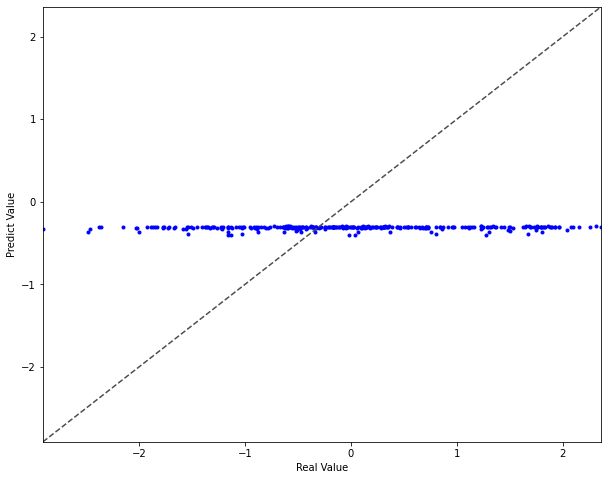

In [281]:
pred = model.predict(lunch_X_test)

plt.figure(figsize=(10,8))
plt.plot(lunch_y_test, pred, 'b.')

plt.axis([min(lunch_y_test), max(lunch_y_test), min(lunch_y_test), max(lunch_y_test)])

plt.plot([min(lunch_y_test), max(lunch_y_test)], [min(lunch_y_test), max(lunch_y_test)], ls = "--", c=".3")
plt.xlabel("Real Value")
plt.ylabel("Predict Value")

plt.show()

In [3]:
K.clear_session()

### 데이터 전처리부터 다시 시작

In [2]:
# RNN으로 분석하려면 시계열 데이터여야 하고 이 의미는 데이터 순서가 시간에 맞게 순차적으로 입력되어야함을 의미한다.
# 현재 데이터는 인덱스 순서가 뒤죽박죽이다. 가장 간편한 방법은 datetime이 있는 원본 데이터에서 datetime을 살리고 지금까지의 전처리를 하는 것이다.

lunch = pd.read_csv("data/lunch_df_encoding.csv")
dinner = pd.read_csv("data/dinner_df_encoding.csv")

In [3]:
lunch.head()

,datetime,year,month,date,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,...,season_winter,weekdays_friday,weekdays_monday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday,vacation_N,vacation_Y,new_lunch_N,new_lunch_Y
0,2016-02-01,2016,2,1,2601,2401,50,150,238,0,...,1,0,1,0,0,0,1,0,1,0
1,2016-02-02,2016,2,2,2601,2378,50,173,319,0,...,1,0,0,0,1,0,1,0,1,0
2,2016-02-03,2016,2,3,2601,2365,56,180,111,0,...,1,0,0,0,0,1,1,0,1,0
3,2016-02-04,2016,2,4,2601,2277,104,220,355,0,...,1,0,0,1,0,0,1,0,1,0
4,2016-02-05,2016,2,5,2601,2142,278,181,34,0,...,1,1,0,0,0,0,0,1,1,0


In [4]:
dinner.head()

,datetime,year,month,date,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,...,season_winter,weekdays_friday,weekdays_monday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday,vacation_N,vacation_Y,new_dinner_N,new_dinner_Y
0,2016-02-01,2016,2,1,2601,2401,50,150,238,0,...,1,0,1,0,0,0,1,0,1,0
1,2016-02-02,2016,2,2,2601,2378,50,173,319,0,...,1,0,0,0,1,0,1,0,1,0
2,2016-02-03,2016,2,3,2601,2365,56,180,111,0,...,1,0,0,0,0,1,1,0,1,0
3,2016-02-04,2016,2,4,2601,2277,104,220,355,0,...,1,0,0,1,0,0,1,0,1,0
4,2016-02-05,2016,2,5,2601,2142,278,181,34,0,...,1,1,0,0,0,0,0,1,1,0


In [5]:
lunch.dropna()
dinner.dropna()

,datetime,year,month,date,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,...,season_winter,weekdays_friday,weekdays_monday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday,vacation_N,vacation_Y,new_dinner_N,new_dinner_Y
0,2016-02-01,2016,2,1,2601,2401,50,150,238,0,...,1,0,1,0,0,0,1,0,1,0
1,2016-02-02,2016,2,2,2601,2378,50,173,319,0,...,1,0,0,0,1,0,1,0,1,0
2,2016-02-03,2016,2,3,2601,2365,56,180,111,0,...,1,0,0,0,0,1,1,0,1,0
3,2016-02-04,2016,2,4,2601,2277,104,220,355,0,...,1,0,0,1,0,0,1,0,1,0
4,2016-02-05,2016,2,5,2601,2142,278,181,34,0,...,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2021,1,20,2983,2319,75,198,4,391,...,1,0,0,0,0,1,1,0,1,0
1201,2021-01-21,2021,1,21,2983,2309,92,231,462,351,...,1,0,0,1,0,0,1,0,1,0
1202,2021-01-22,2021,1,22,2983,2177,255,248,1,303,...,1,1,0,0,0,0,1,0,1,0
1203,2021-01-25,2021,1,25,2983,2396,107,153,616,327,...,1,0,1,0,0,0,1,0,1,0


In [6]:
def split_lunch(data):
    data_train = data.drop(["lunch_number", "datetime", 'year', 'month', 'date'], axis = "columns")
    data_target = data.loc[:, 'lunch_number']
    X_train, X_test, y_train, y_test = train_test_split(data_train, data_target)

    return X_train, X_test, y_train, y_test

def split_dinner(data):
    data_train = data.drop(["dinner_number", "datetime", 'year', 'month', 'date'], axis = "columns")
    data_target = data.loc[:, 'dinner_number']
    X_train, X_test, y_train, y_test = train_test_split(data_train, data_target)

    return X_train, X_test, y_train, y_test

In [7]:
lunch_X_train, lunch_X_test, lunch_y_train, lunch_y_test = split_lunch(lunch)
dinner_X_train, dinner_X_test, dinner_y_train, dinner_y_test = split_dinner(dinner)

In [8]:
lunch_X_train = lunch_X_train.sort_index()
lunch_X_test = lunch_X_test.sort_index()
lunch_y_train = lunch_y_train.sort_index()
lunch_y_test = lunch_y_train.sort_index()
dinner_X_train = dinner_X_train.sort_index()
dinner_X_test = dinner_X_test.sort_index()
dinner_y_train = dinner_y_train.sort_index()
dinner_y_test = dinner_y_test.sort_index()

In [9]:
lunch_X_train.head()


,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,temperature,rain,wind,humidity,...,season_winter,weekdays_friday,weekdays_monday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday,vacation_N,vacation_Y,new_lunch_N,new_lunch_Y
0,2601,2401,50,150,238,0,-0.6,0.0,1.3,43.9,...,1,0,1,0,0,0,1,0,1,0
1,2601,2378,50,173,319,0,-2.3,0.0,0.8,47.5,...,1,0,0,0,1,0,1,0,1,0
2,2601,2365,56,180,111,0,-1.7,0.0,0.6,57.1,...,1,0,0,0,0,1,1,0,1,0
3,2601,2277,104,220,355,0,-0.2,0.0,0.7,53.4,...,1,0,0,1,0,0,1,0,1,0
4,2601,2142,278,181,34,0,1.3,0.0,1.0,44.4,...,1,1,0,0,0,0,0,1,1,0


In [10]:
dinner_X_train.head()

,worker_number,real_number,vacation_number,biztrip_number,overtime_number,telecom_number,temperature,rain,wind,humidity,...,season_winter,weekdays_friday,weekdays_monday,weekdays_thursday,weekdays_tuesday,weekdays_wednesday,vacation_N,vacation_Y,new_dinner_N,new_dinner_Y
0,2601,2401,50,150,238,0,-0.6,0.0,1.3,43.9,...,1,0,1,0,0,0,1,0,1,0
1,2601,2378,50,173,319,0,-2.3,0.0,0.8,47.5,...,1,0,0,0,1,0,1,0,1,0
3,2601,2277,104,220,355,0,-0.2,0.0,0.7,53.4,...,1,0,0,1,0,0,1,0,1,0
5,2601,2075,383,143,417,0,6.1,0.0,1.0,57.1,...,1,0,0,1,0,0,1,0,1,0
6,2601,2056,389,156,93,0,9.2,62.8,1.1,88.0,...,1,1,0,0,0,0,1,0,1,0


In [11]:
lunch_X_train=lunch_X_train.to_numpy()
lunch_X_train = lunch_X_train.reshape(lunch_X_train.shape[0], lunch_X_train.shape[1], 1)
lunch_X_test=lunch_X_test.to_numpy()
lunch_X_test = lunch_X_test.reshape(lunch_X_test.shape[0], lunch_X_test.shape[1], 1)
lunch_y_train=lunch_y_train.to_numpy()
lunch_y_test=lunch_y_test.to_numpy()
dinner_X_train=dinner_X_train.to_numpy()
dinner_X_train = dinner_X_train.reshape(dinner_X_train.shape[0], dinner_X_train.shape[1], 1)
dinner_X_test=dinner_X_test.to_numpy()
dinner_X_test = dinner_X_test.reshape(dinner_X_test.shape[0], dinner_X_test.shape[1], 1)
dinner_y_train=dinner_y_train.to_numpy()
dinner_y_test=dinner_y_test.to_numpy()

In [12]:
lunch_y_train = lunch_y_train.astype(float)
lunch_y_test = lunch_y_test.astype(float)
dinner_y_train = dinner_y_train.astype(float)
dinner_y_test = dinner_y_test.astype(float)

In [13]:
# lunch_X_mean = lunch_X_train.mean(axis=0)
# lunch_X_std = lunch_X_train.std(axis=0)
# dinner_X_mean = dinner_X_train.mean(axis=0)
# dinner_X_std = dinner_X_train.std(axis=0)

# lunch_X_train -= lunch_X_mean
# lunch_X_train /= lunch_X_std
# lunch_X_test -= lunch_X_mean
# lunch_X_test /= lunch_X_std
# dinner_X_train -= dinner_X_mean
# dinner_X_train /= dinner_X_std
# dinner_X_test -= dinner_X_mean
# dinner_X_test /= dinner_X_std


lunch_y_mean = lunch_y_train.mean(axis=0)
lunch_y_std = lunch_y_train.std(axis=0)
dinner_y_mean = dinner_y_train.mean(axis=0)
dinner_y_std = dinner_y_train.std(axis=0)

lunch_y_train -= lunch_y_mean
lunch_y_train /= lunch_y_std
lunch_y_test -= lunch_y_mean
lunch_y_test /= lunch_y_std
dinner_y_train -= dinner_y_mean
dinner_y_train /= dinner_y_std
dinner_y_test -= dinner_y_mean
dinner_y_test /= dinner_y_std


In [15]:
lunch_X_train.to_csv("data/colab/lunch_X_train.csv", encoding="utf-8", index=False)
lunch_X_test.to_csv("data/colab/lunch_X_test.csv", encoding="utf-8", index=False)
lunch_y_train.to_csv("data/colab/lunch_y_train.csv", encoding="utf-8", index=False)
lunch_y_test.to_csv("data/colab/lunch_y_test.csv", encoding="utf-8", index=False)
dinner_X_train.to_csv("data/colab/dinner_X_train.csv", encoding="utf-8", index=False)
dinner_X_test.to_csv("data/colab/dinner_X_test.csv", encoding="utf-8", index=False)
dinner_y_train.to_csv("data/colab/dinner_y_train.csv", encoding="utf-8", index=False)
dinner_y_test.to_csv("data/colab/dinner_y_test.csv", encoding="utf-8", index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [16]:
model = keras.Sequential([
    layers.LSTM(16, input_shape=(None, 1), activation='relu'),
    layers.Dense(1)
])

model.summary()

# model = keras.Sequential([
#     layers.LSTM(128, input_shape=(None, 1)),
#     layers.Dense(128),
#     layers.Dense(1)
# ])
# model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.00001), loss = 'mse', metrics=['accuracy'])
# model.summary()

# model = keras.Sequential() # Sequeatial Model 
# model.add(layers.LSTM(20, input_shape=(28, 1))) # (timestep, feature) 
# model.add(Dense(1)) # output = 1 
# model.compile(loss='mean_squared_error', optimizer='adam') 
# model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


2022-01-29 22:06:12.160389: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-29 22:06:12.161288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 점심

In [17]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(lunch_X_train, lunch_y_train, 
                                    epochs=200, 
                                    batch_size=16, 
                                    callbacks=[early_stop, checkpoint])

NameError: name 'ModelCheckpoint' is not defined

In [ ]:
## 분석으로 나온 예측값과 실제값의 차이가 너무 크다. 40000이라니 :(
model.evaluate(lunch_X_test, lunch_y_test)

2022-01-20 16:43:36.768796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:43:36.858911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 1s 30ms/step - loss: 1.0793


1.0792758464813232

2022-01-20 16:43:38.434981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-20 16:43:38.476176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


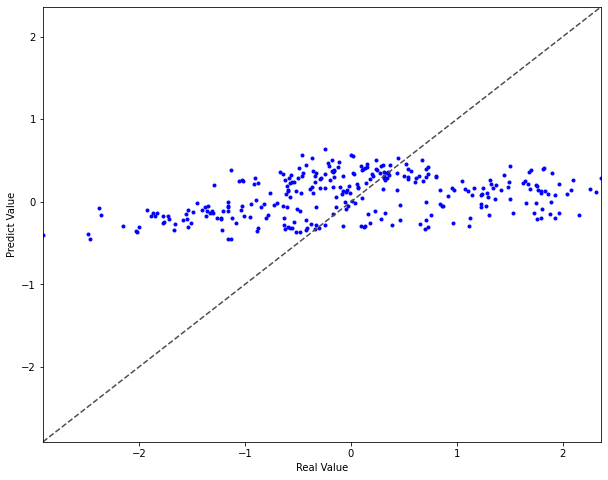

In [ ]:
pred = model.predict(lunch_X_test)

plt.figure(figsize=(10,8))
plt.plot(lunch_y_test, pred, 'b.')

plt.axis([min(lunch_y_test), max(lunch_y_test), min(lunch_y_test), max(lunch_y_test)])

plt.plot([min(lunch_y_test), max(lunch_y_test)], [min(lunch_y_test), max(lunch_y_test)], ls = "--", c=".3")
plt.xlabel("Real Value")
plt.ylabel("Predict Value")

plt.show()

### 저녁

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(dinner_X_train, dinner_y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
31/31 [==============================] - 1s 37ms/step - loss: 0.9350
Epoch 2/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9307
Epoch 3/100
31/31 [==============================] - 1s 32ms/step - loss: 0.9290
Epoch 4/100
31/31 [==============================] - 1s 33ms/step - loss: 0.9306
Epoch 00004: early stopping
